## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)


sum_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Combine the data into a single dataset


In [2]:
sum_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

means = sum_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
meds = sum_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = sum_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_devs = sum_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
st_errs = sum_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


drug_summary = pd.DataFrame({"Mean Tumor Volume": means,
                              "Median Tumor Volume": meds,
                              "Tumor Volume Variance": var,
                              "Tumor Volume Std. Dev.": st_devs,
                              "Tumor Volume Std. Err.": st_errs})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
sum_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

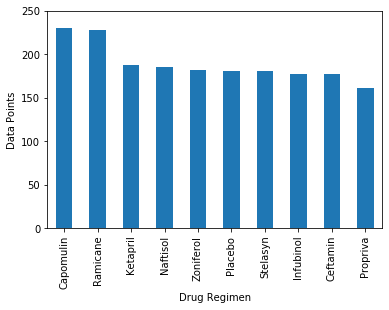

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

sum_df['Drug Regimen'].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.ylim(0, 250)
plt.title('Total Data Points for Drugs')
plt.show()

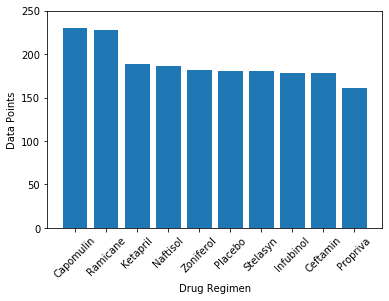

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

data_points = sum_df['Drug Regimen'].value_counts()
x = data_points.index.values
y = data_points.values

plt.bar(x, y)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation=45)
plt.ylim(0, 250)
plt.title('Total Data Points for Drugs')
plt.show()

## Pie plots

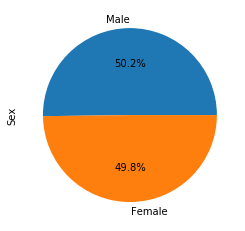

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_metadata.Sex.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.show()

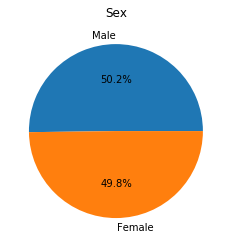

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = mouse_metadata.Sex.value_counts()
plt.pie(gender.values, labels=gender.index.values, autopct='%1.1f%%')
plt.title("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_df = sum_df.loc[sum_df["Drug Regimen"] == "Capomulin"]
capomulin = capomulin_df.loc[capomulin_df["Timepoint"] == 45]
capomulin_vol = capomulin["Tumor Volume (mm3)"]
ramicane_df = sum_df.loc[sum_df["Drug Regimen"] == "Ramicane"]
ramicane = ramicane_df.loc[ramicane_df["Timepoint"] == 45]
ramicane_vol = ramicane["Tumor Volume (mm3)"]
infubinol_df = sum_df.loc[sum_df["Drug Regimen"] == "Infubinol"]
infubinol = infubinol_df.loc[infubinol_df["Timepoint"] == 45]
infubinol_vol = infubinol["Tumor Volume (mm3)"]
ceftamin_df = sum_df.loc[sum_df["Drug Regimen"] == "Ceftamin"]
ceftamin = ceftamin_df.loc[ceftamin_df["Timepoint"] == 45]
ceftamin_vol = capomulin["Tumor Volume (mm3)"]



In [70]:
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
tumor_size = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]

for drug in range(len(drugs)):
    tumor_vol = tumor_size[drug]
    quartiles = tumor_vol.quantile([.25,.5,.75])
    first_quart = quartiles[0.25]
    third_quart = quartiles[0.75]
    iqr = third_quart - first_quart
    lower_bound = first_quart - (iqr * 1.5)
    upper_bound = third_quart + (iqr * 1.5)
    tumor_vol_list = tumor_vol.tolist()
    for i in range(len(tumor_vol_list)):
        outliers = []
        if tumor_vol_list[i] < lower_bound or tumor_vol_list[i] > upper_bound:
            outliers.append(tumor_vol_list[i])
    print(f'{drugs[drug]} Outliers: {outliers}')

Capomulin Outliers: []
Ramicane Outliers: []
Infubinol Outliers: []
Ceftamin Outliers: []


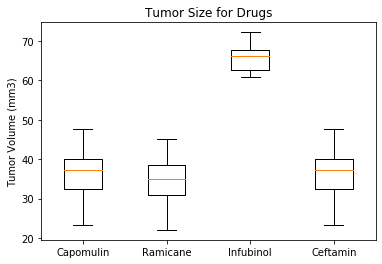

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_size)
plt.xticks([1, 2, 3, 4], ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Size for Drugs')
plt.show()

## Line and scatter plots

In [78]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


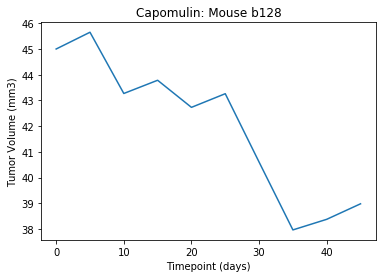

In [87]:
mouse_id = capomulin_df['Mouse ID'][0]
mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin: Mouse {mouse_id}')
plt.show()

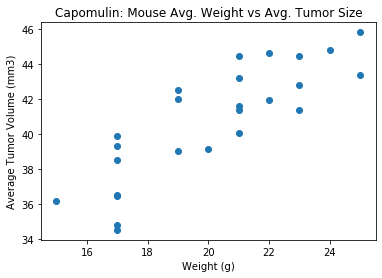

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg_value = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg_value['Weight (g)'], capomulin_avg_value['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin: Mouse Avg. Weight vs Avg. Tumor Size")
plt.show()

The average mouse weight and the average tumor volume has a correlation of 0.84


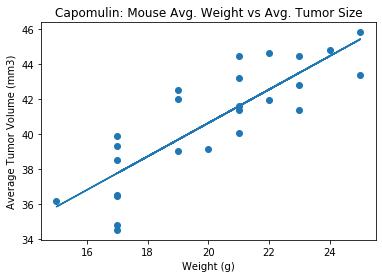

In [92]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(capomulin_avg_value['Weight (g)'], capomulin_avg_value['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin: Mouse Avg. Weight vs Avg. Tumor Size")

corr = round(st.pearsonr(capomulin_avg_value['Weight (g)'], capomulin_avg_value['Tumor Volume (mm3)'])[0],2)
model = st.linregress(capomulin_avg_value['Weight (g)'], capomulin_avg_value['Tumor Volume (mm3)'])
y = capomulin_avg_value['Weight (g)'] * model[0] + model[1]
plt.plot(capomulin_avg_value['Weight (g)'], y)

print(f"The average mouse weight and the average tumor volume has a correlation of {corr}")
plt.show()